## DESCRIBING DATASET




In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('NVDA.csv')
print(df.describe)

              Open         High          Low        Close    Adj Close  \
count  6116.000000  6116.000000  6116.000000  6116.000000  6116.000000   
mean     53.052266    54.017201    52.031700    53.064741    52.794253   
std     121.267334   123.423982   118.835114   121.183234   121.214864   
min       0.608333     0.656667     0.600000     0.614167     0.563377   
25%       2.959688     3.027500     2.875000     2.950391     2.707880   
50%       4.683750     4.747500     4.608750     4.682500     4.389289   
75%      42.101873    42.645625    41.500000    42.102499    41.741090   
max     958.510010   974.000000   935.099976   950.020020   950.020020   

             Volume  
count  6.116000e+03  
mean   6.221933e+07  
std    4.316714e+07  
min    4.564400e+06  
25%    3.615840e+07  
50%    5.206235e+07  
75%    7.465490e+07  
max    9.230856e+08  


In [7]:
print(df.head())

         Date      Open      High       Low     Close  Adj Close    Volume
0  2000-01-03  0.984375  0.992188  0.919271  0.975260   0.894608  30091200
1  2000-01-04  0.958333  0.960938  0.901042  0.949219   0.870721  30048000
2  2000-01-05  0.921875  0.937500  0.904948  0.917969   0.842055  18835200
3  2000-01-06  0.917969  0.917969  0.822917  0.858073   0.787112  12048000
4  2000-01-07  0.854167  0.881510  0.841146  0.872396   0.800251   7118400


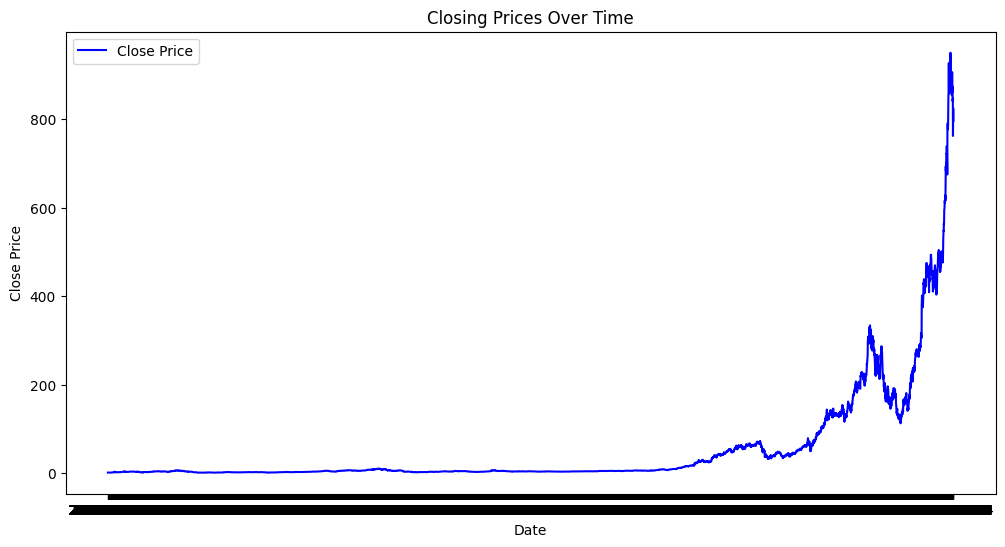

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='b', label='Close Price')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## PRE PROCESSING / CLEANING

In [10]:
from sklearn.preprocessing import MinMaxScaler

df = df.drop_duplicates()

In [14]:
# assuming adj close is redundant
if 'Adj Close' in df.columns:
    df.drop('Adj Close', axis=1, inplace=True)

# handling missing values
columns_to_process = ['Open', 'High', 'Low', 'Close', 'Volume']
df[columns_to_process] = df[columns_to_process].fillna(df[columns_to_process].mean())

# normalizing selected columns
scaler = MinMaxScaler()
df[columns_to_process] = scaler.fit_transform(df[columns_to_process])

print("\nUpdated Summary: ")
print(df.describe())


Updated Summary: 
              Open         High          Low        Close       Volume
count  6116.000000  6116.000000  6116.000000  6116.000000  6116.000000
mean      0.054749     0.054822     0.055037     0.055246     0.062769
std       0.126597     0.126804     0.127164     0.127641     0.046996
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.002455     0.002436     0.002434     0.002461     0.034397
50%       0.004255     0.004203     0.004290     0.004285     0.051711
75%       0.043317     0.043139     0.043767     0.043699     0.076308
max       1.000000     1.000000     1.000000     1.000000     1.000000


In [15]:
df.to_csv('preprocessed_dataset.csv', index=False)

##DECISION TREE / ASSOCIATION RULE Application

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

df = pd.read_csv('NVDA.csv')

# Date isnt an appropriate column for application
features = ['Open', 'High', 'Low', 'Close', 'Volume']  # Define feature columns

# target
target_variable = 'Close'

# splitting dataset
X = df[features]
y = df[target_variable]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DTC regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# predictions
y_pred = regressor.predict(X_test)

# Evaluate the regressor using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.2f}")

R-squared Score: 1.00


In [20]:
# ASSOCIATION RULE
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv('NVDA.csv')
df = df.drop('Date', axis=1)

# numerical to categorical val
df_bin = df.apply(lambda x: pd.qcut(x, q=4, duplicates='drop', labels=False))
frequent_itemsets = apriori(df_bin, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("Association Rules:")
print(rules)

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 2

##EXPLORATORY DATA ANALYSIS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6116 entries, 0 to 6115
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6116 non-null   float64
 1   High       6116 non-null   float64
 2   Low        6116 non-null   float64
 3   Close      6116 non-null   float64
 4   Adj Close  6116 non-null   float64
 5   Volume     6116 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 286.8 KB
None

Descriptive Statistics:
              Open         High          Low        Close    Adj Close  \
count  6116.000000  6116.000000  6116.000000  6116.000000  6116.000000   
mean     53.052266    54.017201    52.031700    53.064741    52.794253   
std     121.267334   123.423982   118.835114   121.183234   121.214864   
min       0.608333     0.656667     0.600000     0.614167     0.563377   
25%       2.959688     3.027500     2.875000     2.950391     2.707880   
50%       4.683750     4.74

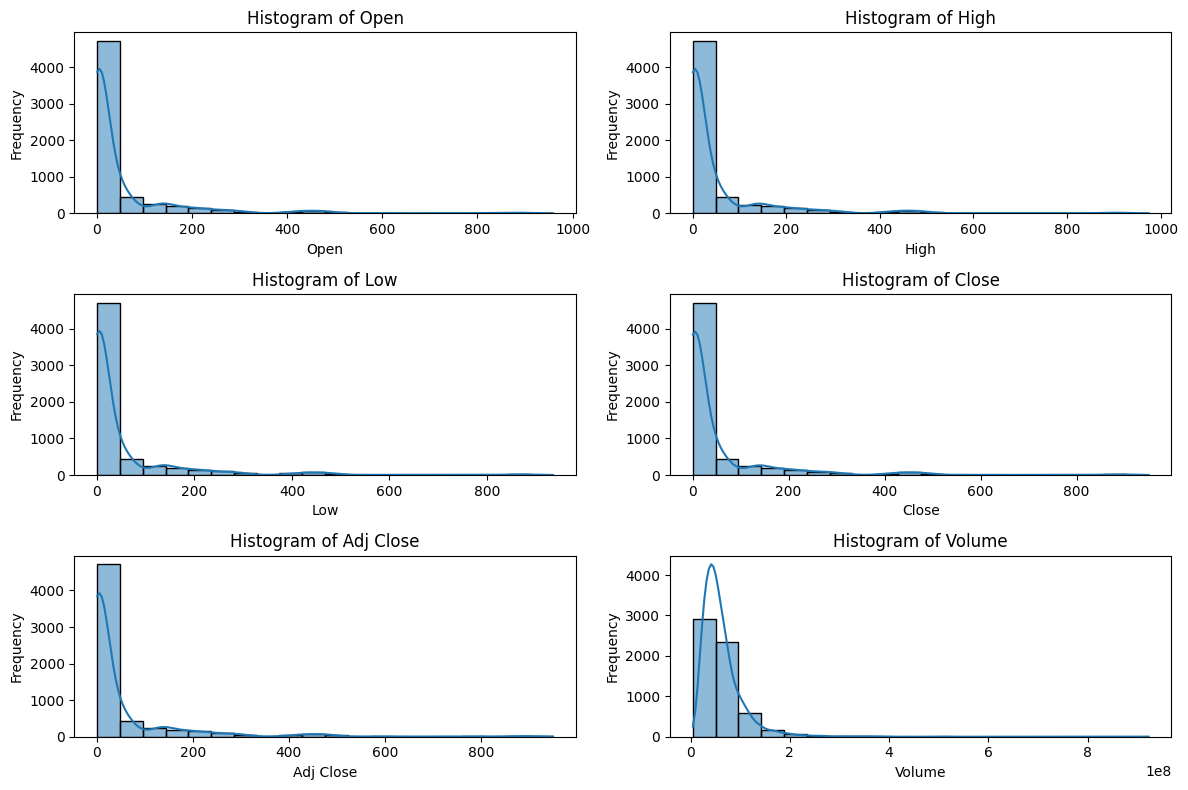

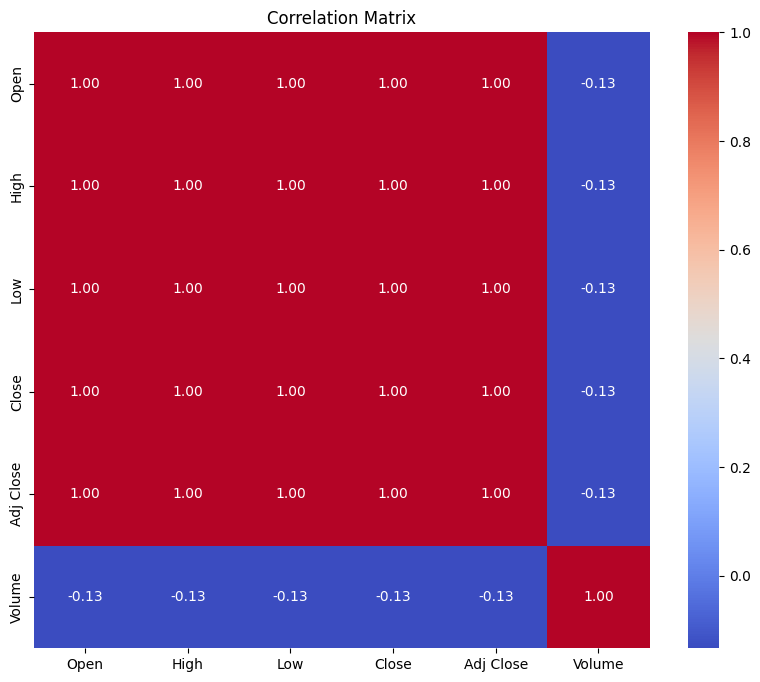

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('NVDA.csv')
df = df.drop('Date', axis=1)

print("Dataset Information:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())


plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# P (correlation matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

## LINEAR REGRESSION

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14
R-squared Score (R2): 1.00


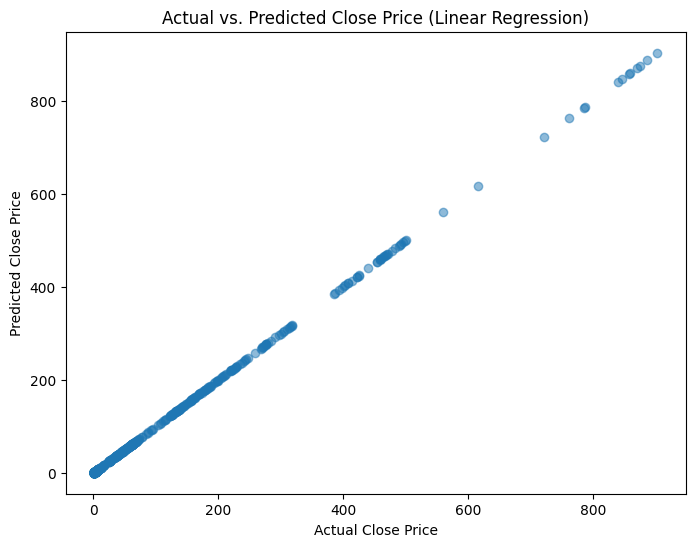

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = pd.read_csv('NVDA.csv')
df = df.drop('Date', axis=1)
X = df.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = df['Close']  # Target variable is 'Close'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs. Predicted Close Price (Linear Regression)')
plt.show()


##TIME SERIES ANALYSIS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


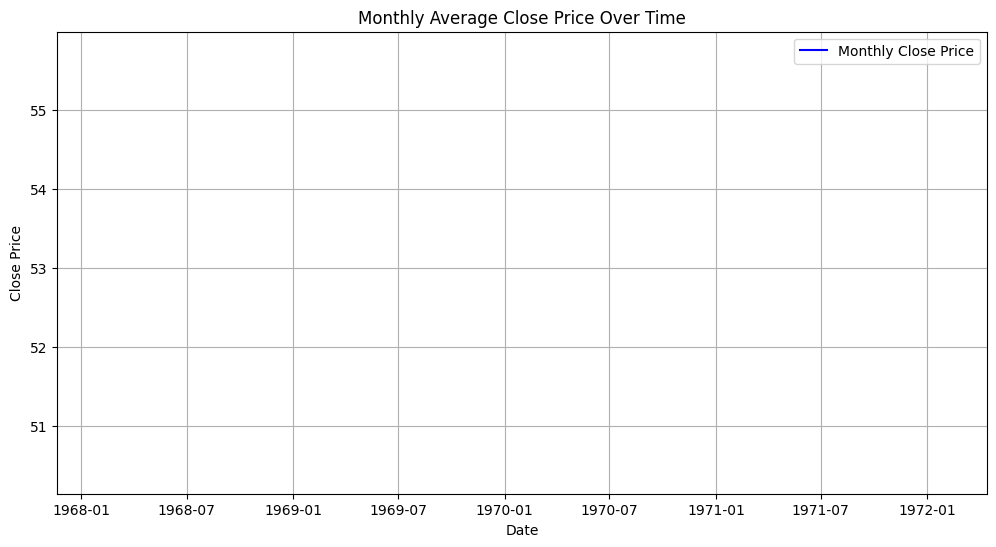

ValueError: x must have 2 complete cycles requires 24 observations. x only has 1 observation(s)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


df = pd.read_csv('NVDA.csv')
df = df.drop('Date', axis=1)

df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

df = df.dropna()
df.index = pd.to_datetime(df.index)

df_resampled = df.resample('M').mean()  # Monthly mean closing prices

# Plot the resampled data
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['Close'], label='Monthly Close Price', color='blue')
plt.title('Monthly Average Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
decomposition = sm.tsa.seasonal_decompose(df_resampled['Close'], model='additive', period=12)  # Assuming yearly seasonality
decomposition.plot()
plt.suptitle('Time Series Decomposition')
plt.show()
